In [64]:
# importing required packages
import pandas as pd 
import numpy as np
import seaborn as sns # for visulization
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [65]:
# loading the dataset to perform Exploratory data analysis
df = pd.read_csv("IPL Matches.csv")

In [66]:
#Simple view of data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [67]:
# checking individual null count
df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

<AxesSubplot:>

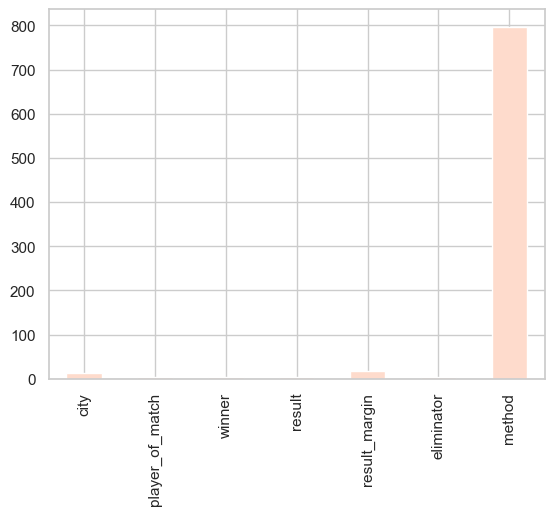

In [68]:
# lets plot the total count of null values in each column
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

#### `Method` column has too many `NaN` values its better to `drop` the column

In [69]:
df.drop('method', axis=1, inplace=True)

<AxesSubplot:>

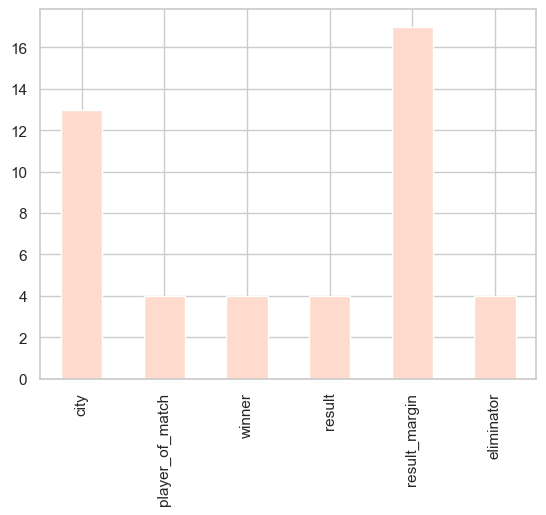

In [70]:
# checking other nan counts using barplot
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

substituting nan values with there column mean for all numerical features

In [71]:
#result_margin is a numerical feature
# result_margin_mean = df['result_margin'].mean()
df['result_margin'].replace(np.NaN, df['result_margin'].mean(), inplace=True)

In [72]:
df['result_margin'].isnull().sum()

0

<AxesSubplot:>

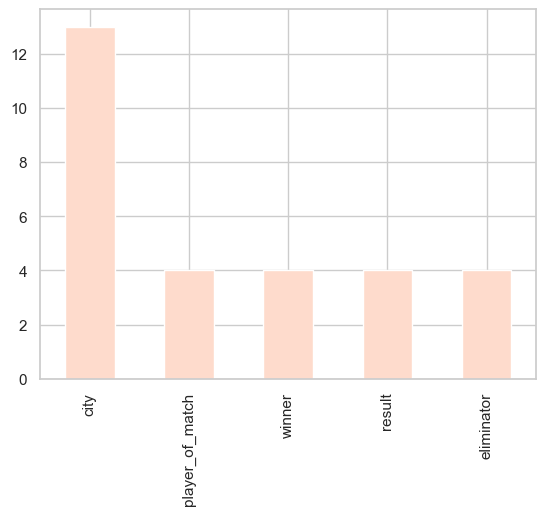

In [73]:
# checking other nan counts using barplot
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

In [74]:
#lets replace missing values in city with most occuring city 
df['city'].replace(np.NaN, df['city'].mode()[0], inplace=True)

In [75]:
df['result_margin'].isnull().sum()

0

<AxesSubplot:>

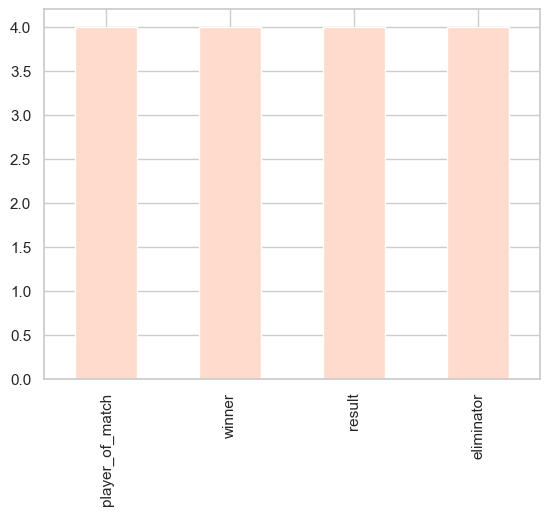

In [76]:
# checking other nan counts using barplot
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

In [77]:
#droping other remaining NaN values as of now
df.dropna(inplace=True)
df.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [78]:
# checking top 5 records for see the structure and fetaures
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


In [79]:
# The team names are changed to their corresponding short notations.
df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

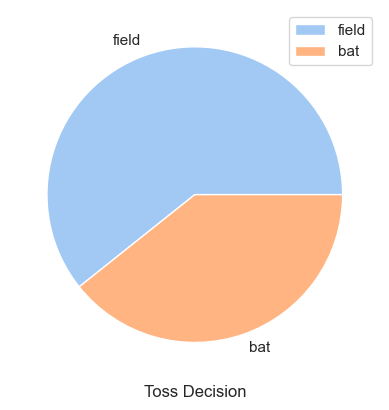

In [80]:
# Plotting toss decision
colors = sns.color_palette('pastel')[0:5]
df['toss_decision'].value_counts().plot(kind='pie',legend=True, colors=colors)
plt.xlabel('Toss Decision')
plt.ylabel('')
plt.show()

<AxesSubplot:>

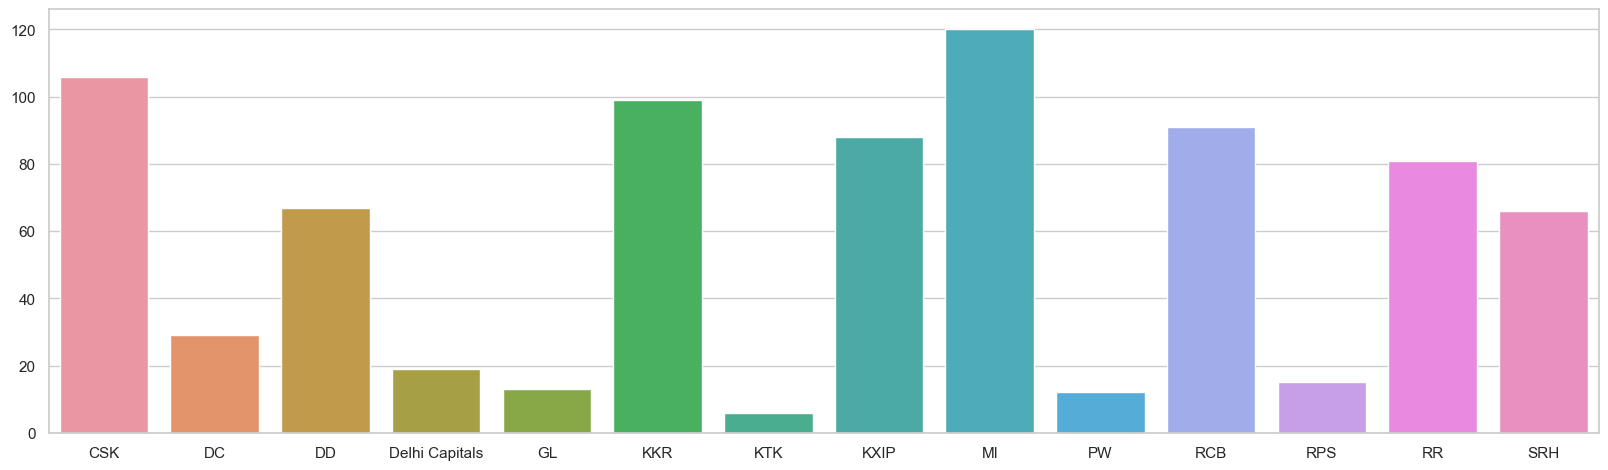

In [81]:
# Ploting Total matches won by each individual team
plt.figure(figsize=(20,5.5))
sns.barplot(y = np.unique(df['winner'], return_counts=True)[1], x=np.unique(df['winner']))

In [82]:
# HERE Rising pune supergaint and Rising pune supergaints are same teams SO Lets merge both
df.replace('Rising Pune Supergiant', 'Rising Pune Supergiants', inplace=True)

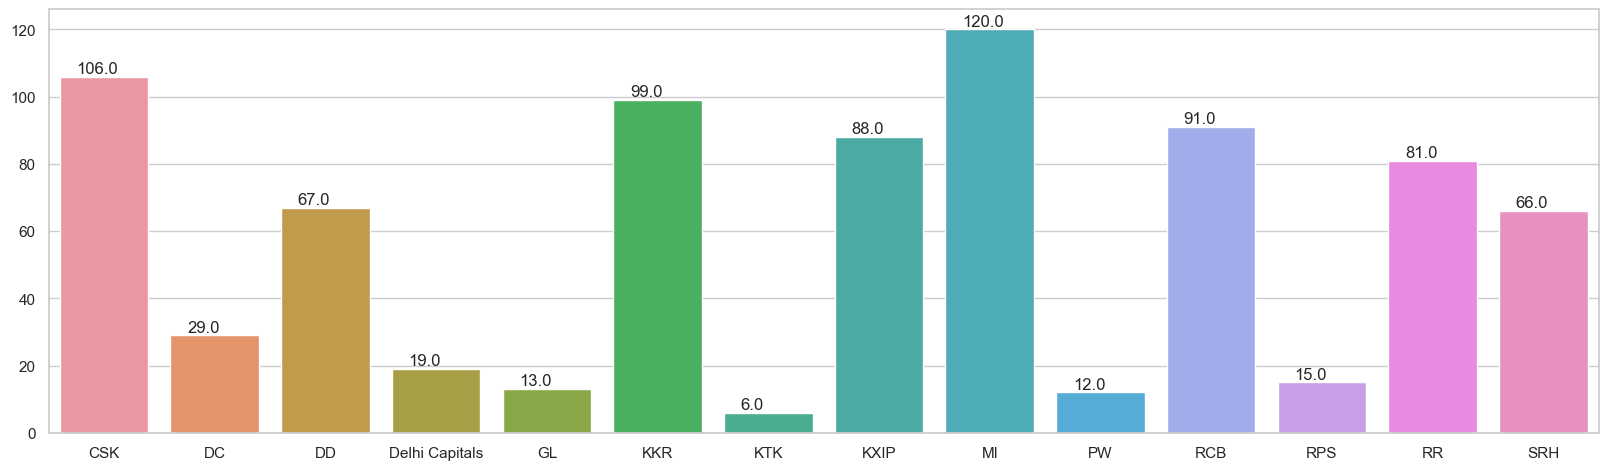

In [83]:
# Ploting Total matches won by each individual team
plt.figure(figsize=(20,5.5))
sns.set_style("whitegrid")
ax = sns.barplot(y = np.unique(df['winner'], return_counts=True)[1], x=np.unique(df['winner']))
for team in ax.patches:
    ax.annotate(format(team.get_height()), (team.get_x()+0.15, team.get_height()+1))

`Mumbai Indians` stands in first with `120` total match wins, then `Chennai Super Kings` in second with 106

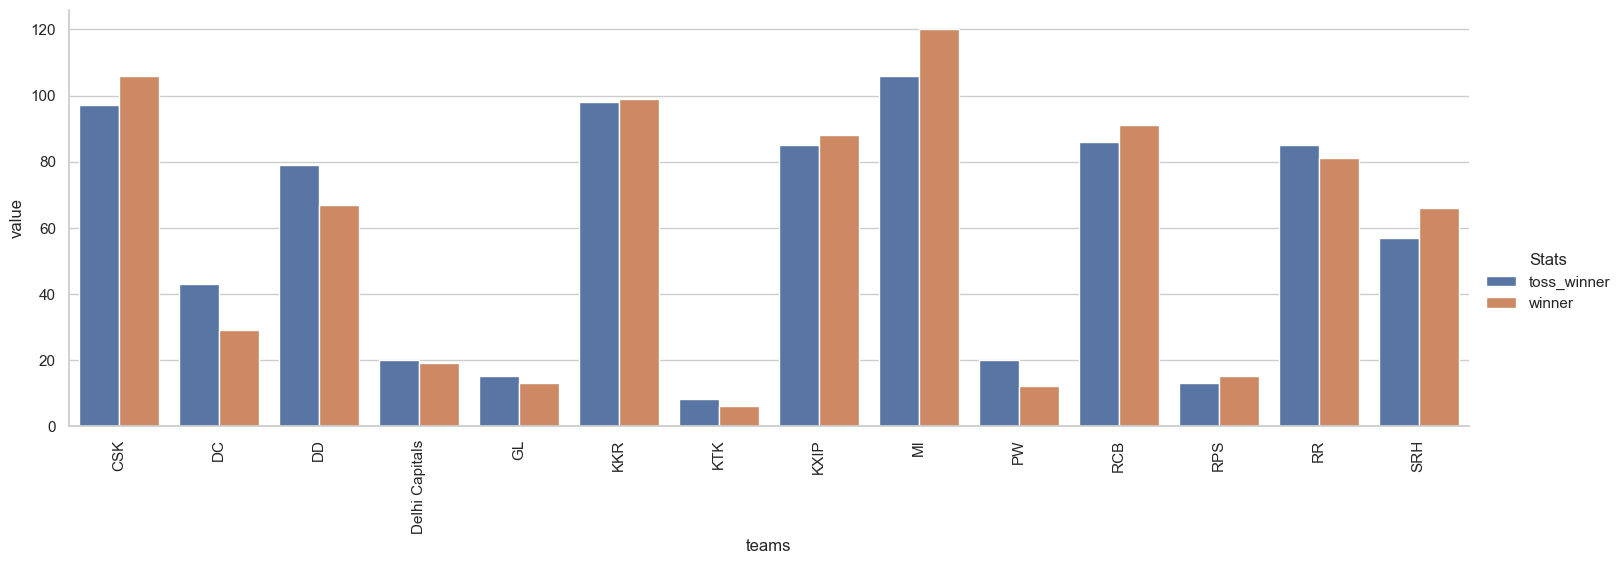

In [84]:
# Lets plot a graph against toss wins vs match wins
dfs = pd.DataFrame(data={'toss_winner': np.unique(df['toss_winner'], return_counts=True)[1], 
                        'winner': np.unique(df['winner'], return_counts=True)[1], 
                         'teams': np.unique(df['toss_winner'], return_counts=True)[0]})

dfs1 = pd.melt(dfs, id_vars = "teams")
dfs1 = dfs1.rename(columns={"variable": "Stats"})
sns.set(style='whitegrid')
ax = sns.catplot(x = 'teams', y='value', 
               hue = 'Stats',data=dfs1, kind='bar', height=5, aspect=3)

plt.xticks(rotation=90)
plt.show()

The bar graph shows that, in the majority of circumstances, `"winning the toss"` is "directly related" to `"winning"` the match.

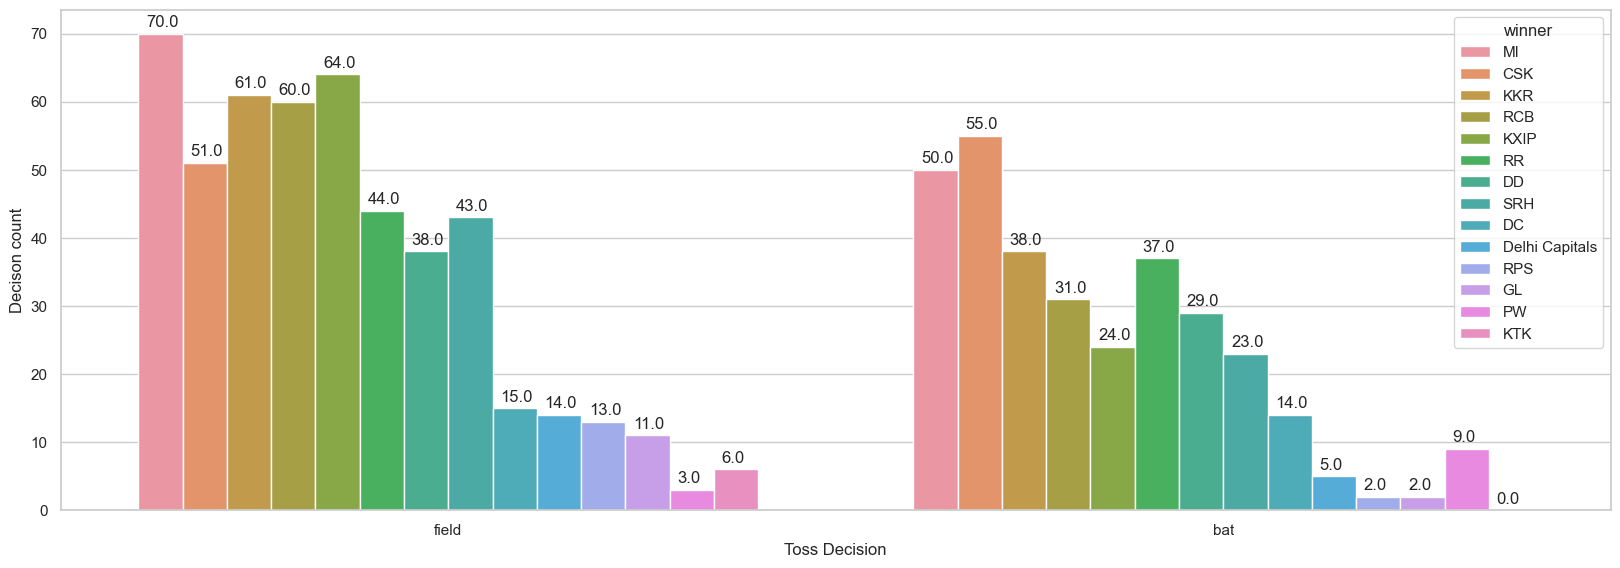

In [85]:
# plotting wins against toss decision made by the team
plt.figure(figsize=(20,6.5))
ax = sns.countplot(x='toss_decision', data = df, hue='winner', hue_order= df['winner'].value_counts().index)
for team in ax.patches:
    ax.annotate(format(team.get_height()), (team.get_x()+0.01, team.get_height()+1))
plt.xlabel('Toss Decision')
plt.ylabel('Decison count')
plt.show()

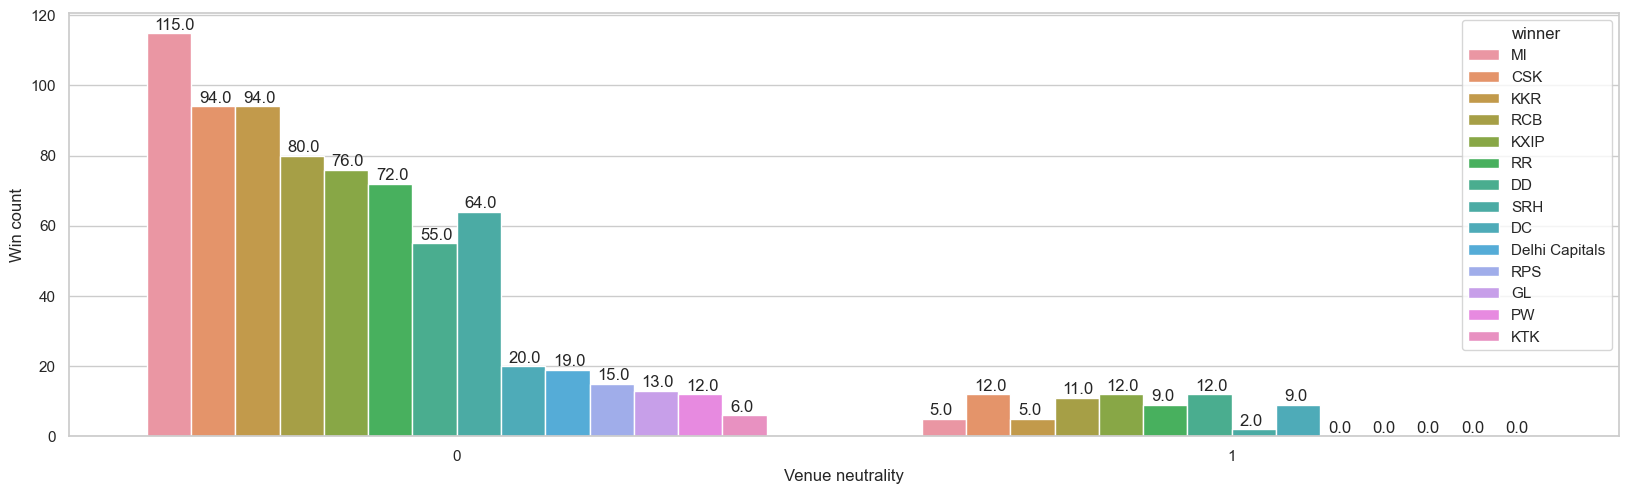

In [86]:
plt.figure(figsize=(20,5.5))
ax = sns.countplot(x='neutral_venue', data = df, hue='winner', hue_order= df['winner'].value_counts().index)
for team in ax.patches:
    ax.annotate(format(team.get_height()), (team.get_x()+0.01, team.get_height()+1))
plt.xlabel('Venue neutrality')
plt.ylabel('Win count')
plt.show()

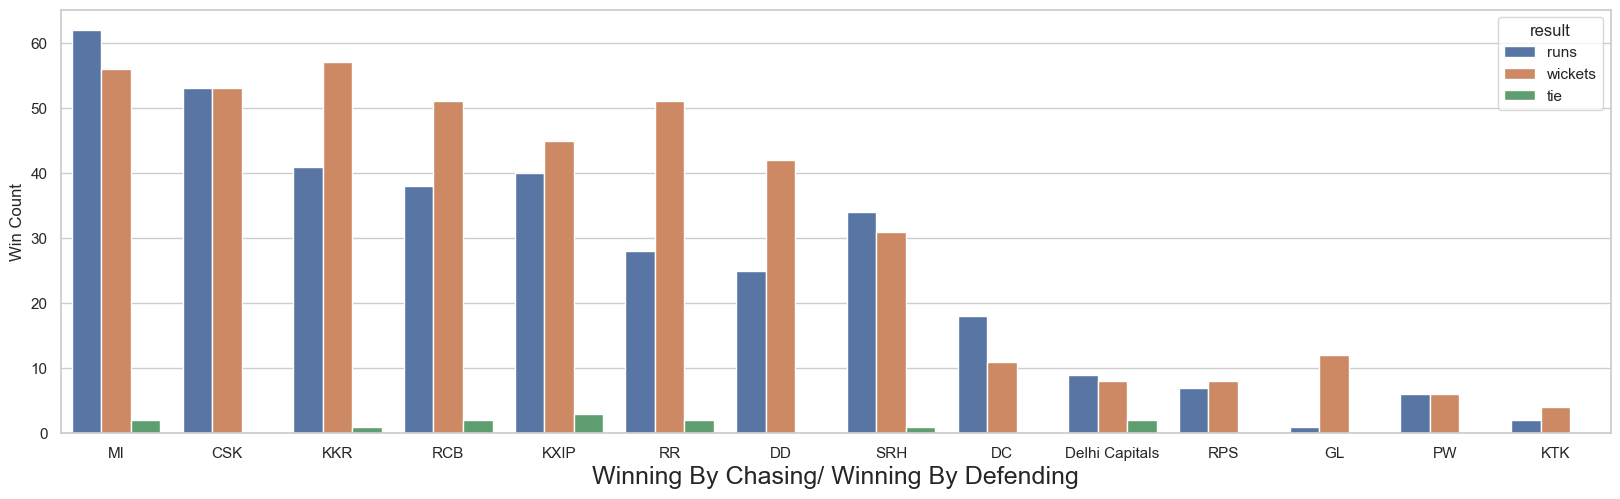

In [87]:
# lets plot wins by chasing / defending
plt.figure(figsize=(20,5.5))

sns.countplot(x='winner', data = df, hue='result', order = df['winner'].value_counts().index)
plt.xlabel('Winning By Chasing/ Winning By Defending', fontsize=18)
sns.set(style=None)
plt.ylabel('Win Count')
plt.show()

The graph dipicts that `Mumbai Indians` and `Chennai super Kings` are `best` `All rounders` i.e (defenders and chasers) where as `Kolkata Knight Riders`, `Delhi Daredevils` and `RCB` are good at `chasing`.

In [88]:
# lets create a new column name 'loser', it contains the team who lost the match.
df.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,DD,RR,RR,bat,DD,wickets,9.0,N,Aleem Dar,GA Pratapkumar


In [89]:
df['loser'] = [df.team2.iloc[index] if df.winner.iloc[index]==df.team1.iloc[index] else df.team1.iloc[index] for index in range(len(df))]

In [90]:
# displaying team1 , team2, winner and loser
df[['team1', 'team2', 'winner', 'loser']].head(5)

,team1,team2,winner,loser
0,RCB,KKR,KKR,RCB
1,KXIP,CSK,CSK,KXIP
2,DD,RR,DD,RR
3,MI,RCB,RCB,MI
4,KKR,DC,KKR,DC


Text(0.5, 0, 'lost the game after winning the toss')

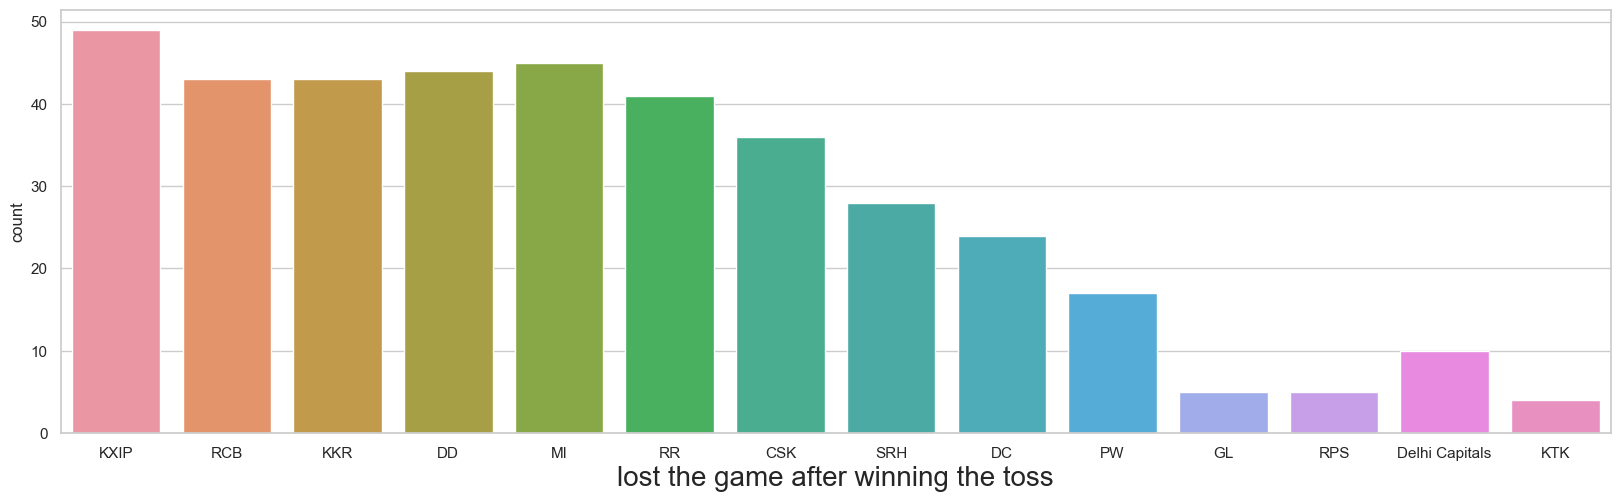

In [91]:
# We can now plot how often a team won the toss but lost the game.
plt.figure(figsize=(20,5.5))
sns.set(style='whitegrid')
sns.countplot(x='loser', data = df[df.toss_winner==df.loser], order = df['loser'].value_counts().index)
plt.xlabel('lost the game after winning the toss', fontsize= 20)

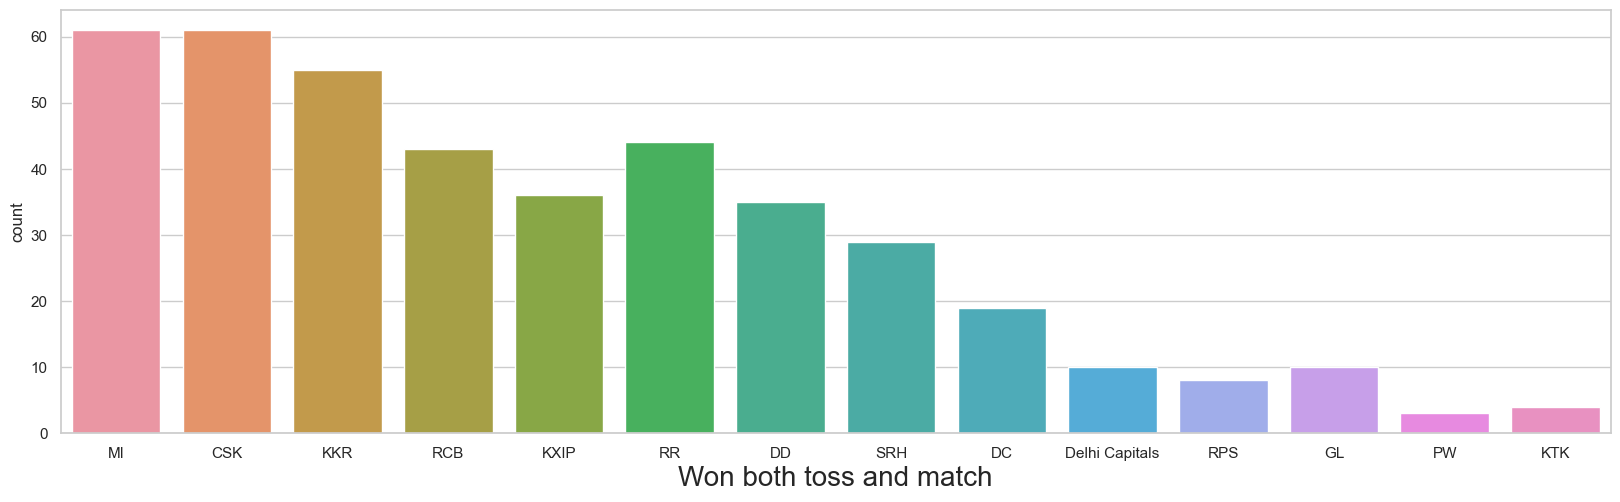

In [92]:
# We can now plot how often a team won the toss aswell as won the game.
plt.figure(figsize=(20,5.5))
sns.set(style='whitegrid')
a = sns.countplot(x='winner', data = df[df.toss_winner==df.winner], order = df['winner'].value_counts().index)
plt.xlabel('Won both toss and match', fontsize= 20)
plt.show()

The probability of winning a match is high if you win the toss because it does give you a chance to select field/bat

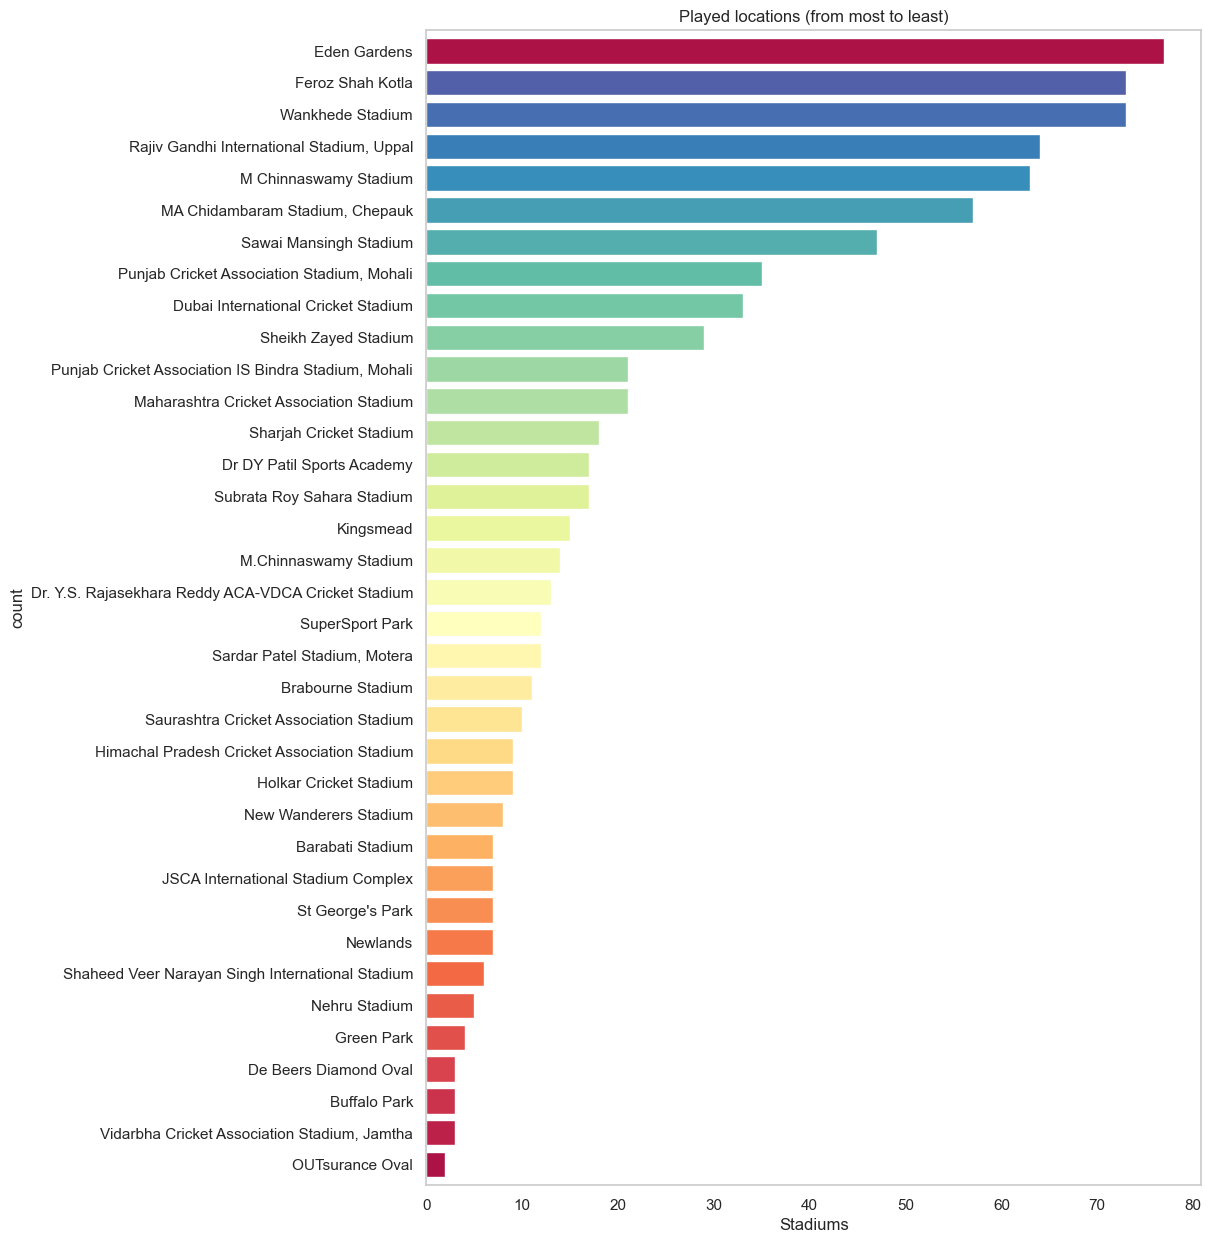

In [93]:
plt.subplots(figsize=(10,15))
sns.set(style='white')
ax = df['venue'].value_counts().sort_values(ascending=True).plot.barh(color=sns.color_palette('Spectral',35), width=.8)
ax.set_xlabel('Stadiums')
ax.set_ylabel('count')
plt.title("Played locations (from most to least)")
plt.show()

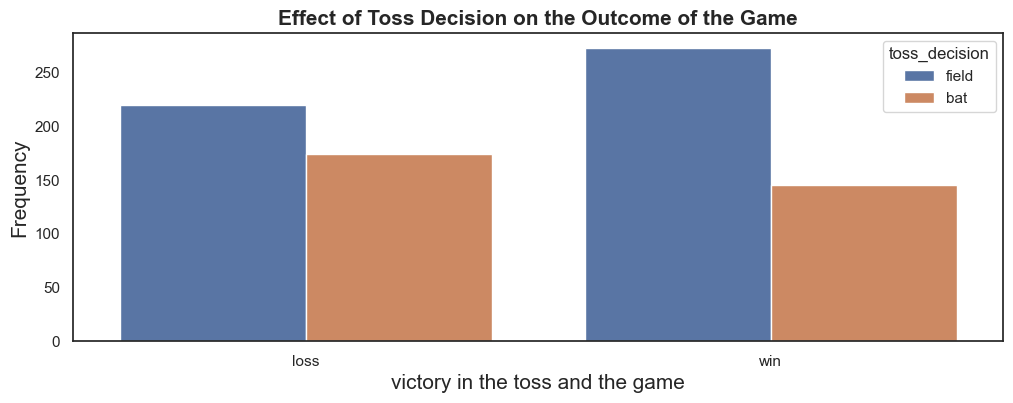

In [94]:
# df['game_and_toss_win'] = np.where((df.toss_winner == df.winner),'win','loss')
df['game_and_toss_win'] = ['win' if df.toss_winner.iloc[index]==df.winner.iloc[index] else 'loss' for index in range(len(df))]
plt.figure(figsize = (12,4))
sns.countplot(x ='game_and_toss_win', data=df, hue = 'toss_decision',)
plt.title("Effect of Toss Decision on the Outcome of the Game", fontsize=15,fontweight="bold")
plt.xlabel("victory in the toss and the game", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

When a team `wins the toss`, their `chances` of winning the game `increase`.

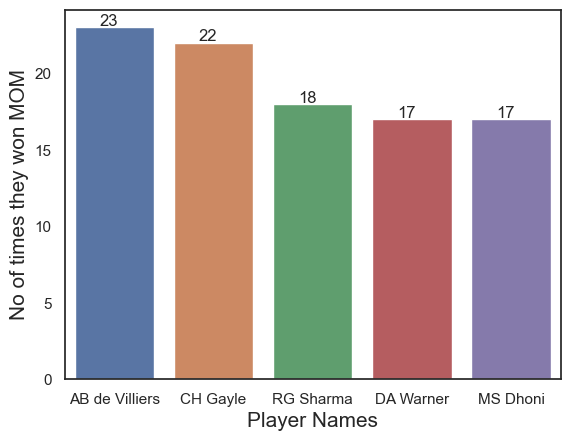

In [95]:
# plotting top 5 Man of the match
f = pd.DataFrame(pd.value_counts(df['player_of_match']))
ax = sns.barplot(y=f['player_of_match'].head(5), x=f.index[:5])
for team in ax.patches:
    ax.annotate(format(int(team.get_height())), (team.get_x()+0.25, team.get_height()+0.1))
plt.xlabel("Player Names", fontsize = 15)
plt.ylabel("No of times they won MOM", fontsize = 15)
plt.show()

With `23` victories, `"AB de Villiers"` is without a doubt the player with the most `MOM awards`.

# Model training and Model Testing

In [96]:
# lets import required packages
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [97]:
df.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,loser,game_and_toss_win
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,Asad Rauf,RE Koertzen,RCB,loss
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,MR Benson,SL Shastri,KXIP,win
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,DD,RR,RR,bat,DD,wickets,9.0,N,Aleem Dar,GA Pratapkumar,RR,loss
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,5.0,N,SJ Davis,DJ Harper,MI,loss
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,KKR,DC,DC,bat,KKR,wickets,5.0,N,BF Bowden,K Hariharan,DC,loss


In [98]:
# there are plenty of categorical values lets convert them into numerical values
for column in df.columns:
    if df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [99]:
df.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,loser,game_and_toss_win
0,335982,2,326,30,14,0,10,5,10,1,5,0,140.0,0,7,29,10,0
1,335983,7,348,124,23,0,7,0,0,0,0,0,33.0,0,26,40,7,1
2,335984,10,348,125,8,0,2,12,12,0,2,2,9.0,0,6,13,12,0
3,335985,23,373,140,35,0,8,10,8,0,10,2,5.0,0,39,12,8,0
4,335986,22,373,48,7,0,5,1,1,0,5,2,5.0,0,8,19,1,0


In [100]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [101]:
x = df.drop('winner', axis=1)
y = df['winner']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify = y)

In [102]:
%%time
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=555)
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555, eval_metric='logloss')
clfs = list()
score_list = list()
labels = ['Logistic Regression',
                       'Random Forest',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, KNC, DTC, ABC, BC, GBC, clf_XGB], labels):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=4, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    score_list.append(scores.mean())
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(X_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.162 (+/- 0.005) [Logistic Regression]
Test Accuracy: 0.1306 
Train CV Accuracy: 0.660 (+/- 0.060) [Random Forest]
Test Accuracy: 0.7164 
Train CV Accuracy: 0.085 (+/- 0.004) [KNeighbors]
Test Accuracy: 0.1007 
Train CV Accuracy: 0.700 (+/- 0.077) [Decision Tree]
Test Accuracy: 0.7239 
Train CV Accuracy: 0.233 (+/- 0.040) [Ada Boost]
Test Accuracy: 0.1903 
Train CV Accuracy: 0.836 (+/- 0.055) [Bagging]
Test Accuracy: 0.8806 
Train CV Accuracy: 0.910 (+/- 0.025) [Gradient Boosting]
Test Accuracy: 0.9515 
Train CV Accuracy: 0.930 (+/- 0.033) [XGBoost]
Test Accuracy: 0.9403 
CPU times: total: 25.1 s
Wall time: 16.1 s


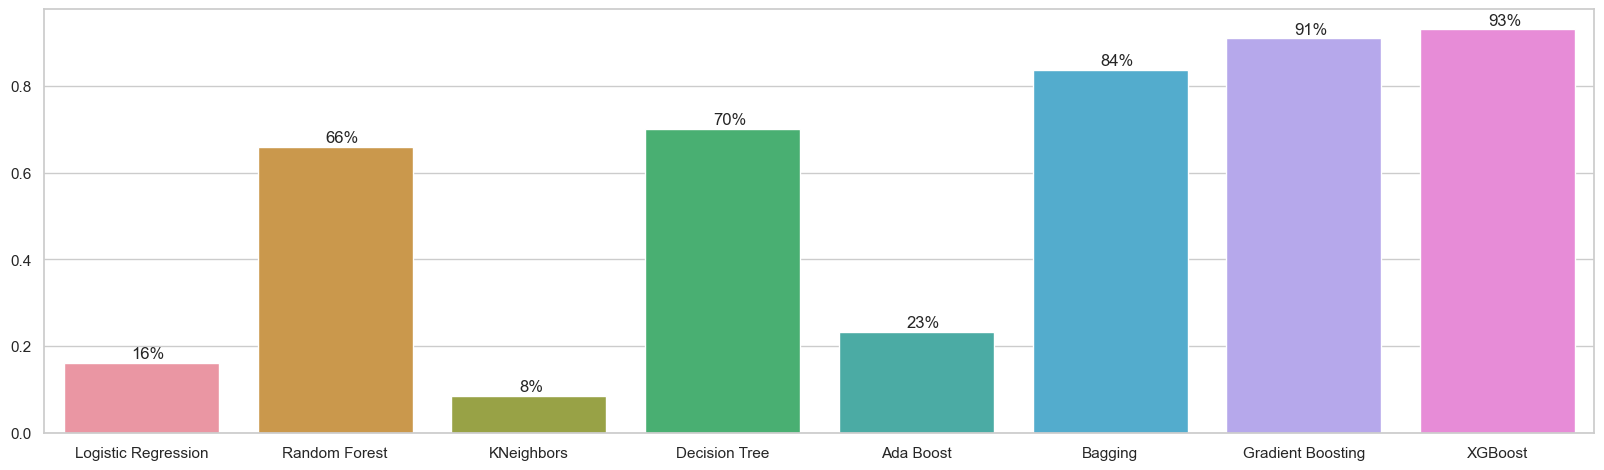

In [103]:
plt.figure(figsize=(20,5.5))
sns.set_palette("Reds")
sns.set_style('whitegrid')
ax = sns.barplot(y=score_list, x = labels)
for team in ax.patches:
    ax.annotate(format(str(int(round(team.get_height(), 2)*100))+"%"), (team.get_x()+0.35, team.get_height()+0.01))

It is clear that `Gradient Boosting` and `XGBoost` are the best fit model for this dataset.

# Preprocessing Technique
### Lets Try to Normalization Data

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

In [105]:
%%time
clfs = list()
score_list = list()
labels = ['Logistic Regression',
                       'Random Forest',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, KNC, DTC, ABC, BC, GBC, clf_XGB], labels):
    scores = sklearn.model_selection.cross_val_score(clf, scaled_train, y_train, cv=4, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    score_list.append(scores.mean())
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(scaled_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.498 (+/- 0.044) [Logistic Regression]
Test Accuracy: 0.0896 
Train CV Accuracy: 0.658 (+/- 0.065) [Random Forest]
Test Accuracy: 0.1157 
Train CV Accuracy: 0.296 (+/- 0.043) [KNeighbors]
Test Accuracy: 0.0821 
Train CV Accuracy: 0.702 (+/- 0.079) [Decision Tree]
Test Accuracy: 0.0746 
Train CV Accuracy: 0.233 (+/- 0.040) [Ada Boost]
Test Accuracy: 0.1381 
Train CV Accuracy: 0.820 (+/- 0.058) [Bagging]
Test Accuracy: 0.0746 
Train CV Accuracy: 0.906 (+/- 0.028) [Gradient Boosting]
Test Accuracy: 0.0709 
Train CV Accuracy: 0.930 (+/- 0.033) [XGBoost]
Test Accuracy: 0.0896 
CPU times: total: 26.6 s
Wall time: 15.6 s


It is clear that `normalization` does not help much in this `particular dataset`!

### lets apply Principle component analysis

In [106]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components=9)
pca.fit(scaled_train)
pca_train = pca.transform(scaled_train)
pca_test = pca.transform(scaled_test)

In [107]:
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, KNC, DTC, ABC, BC, GBC, clf_XGB],
                      ['Logistic Regression',
                       'Random Forest',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']):
    scores = sklearn.model_selection.cross_val_score(clf, pca_train, y_train, cv=4, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(pca_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(pca_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.226 (+/- 0.017) [Logistic Regression]
Test Accuracy: 0.2649 
Train CV Accuracy: 0.244 (+/- 0.058) [Random Forest]
Test Accuracy: 0.2164 
Train CV Accuracy: 0.210 (+/- 0.037) [KNeighbors]
Test Accuracy: 0.1866 
Train CV Accuracy: 0.167 (+/- 0.032) [Decision Tree]
Test Accuracy: 0.1455 
Train CV Accuracy: 0.158 (+/- 0.022) [Ada Boost]
Test Accuracy: 0.1604 
Train CV Accuracy: 0.246 (+/- 0.018) [Bagging]
Test Accuracy: 0.2463 
Train CV Accuracy: 0.204 (+/- 0.018) [Gradient Boosting]
Test Accuracy: 0.2201 
Train CV Accuracy: 0.213 (+/- 0.029) [XGBoost]
Test Accuracy: 0.2463 


Even `PCA` doesnot help much but even worse the condition in this particular dataset!

### Lets Use `Super leaner` to combine our best model into a single layer.

In [108]:
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [109]:
ensemble_model = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)

In [110]:
ensemble_model.add([BC,GBC])
ensemble_model.add_meta(clf_XGB)
ensemble_model.fit(X_train, y_train)
y_predicted = ensemble_model.predict(X_test)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble_model.predict(X_train), y_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(y_predicted, y_test))


Fitting 2 layers
Processing layer-1             done | 00:00:06
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:06

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  0.9356617647058824
Accuracy - Test :  0.9216417910447762


In [111]:
# So the highest accuracy we can achieve is 94 percent with an SuperLeaner which is preety Good!

# lets plot Consufion matrix

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
y = confusion_matrix(y_predicted, y_test)

<AxesSubplot:>

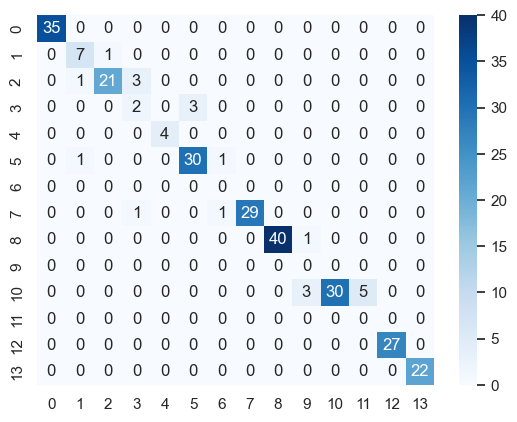

In [114]:
sns.heatmap(y, annot=True, fmt='', cmap='Blues')

In [115]:
file = open("ipl_model.pkl", 'wb')
pickle.dump(ensemble_model, file)